# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Drop Unnecessary Columns

In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding

In [7]:
df['Gender'] = df['Gender'].map({'Female':1,'Male':0})

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


# Convert Cat Data into Num data (in place of onehotencoder)

In [9]:
df = pd.get_dummies(df,columns=['Geography'],dtype='int')
# get_dummies () function is used to convert categorical data into numerical data. It is used to one-hot encode the data.
# The columns parameter is used to specify the columns that need to be converted into numerical data.

# Drop Exited Col

In [10]:
X = df.drop(['Exited'],axis=1)
Y = df['Exited']

# Train Test Split Data

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

# Using Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=4)

In [13]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4)

In [14]:
predictions = decision_tree.predict(X_test)

# Test the Model Accuracy

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1577
           1       0.75      0.43      0.55       423

    accuracy                           0.85      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.84      0.85      0.83      2000



In [16]:
print(confusion_matrix(predictions,Y_test))

[[1515  240]
 [  62  183]]


# Sample Decision Tree Ploting

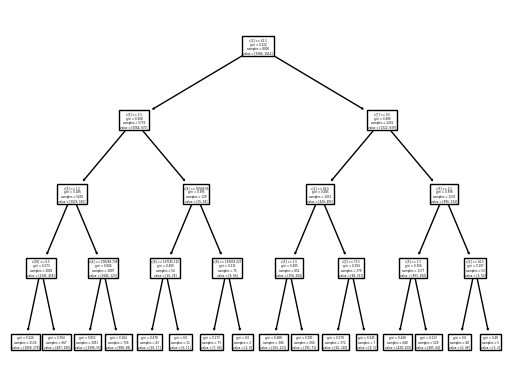

In [17]:
from sklearn import tree
tree.plot_tree(decision_tree)
plt.show()

# Applying Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=41)

# Fitting the model on training data

In [19]:
random_forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=41)

# Making predictions on testing data

In [20]:
predictions = random_forest.predict(X_test)

# Checking the model's performance

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1717
           1       0.52      0.78      0.63       283

    accuracy                           0.87      2000
   macro avg       0.74      0.83      0.77      2000
weighted avg       0.90      0.87      0.88      2000



In [22]:
print(confusion_matrix(predictions,Y_test))

[[1516  201]
 [  61  222]]


# Finding the best no. of estimator for Random Forest using Elbow Method

In [23]:
error = []

for estimator in range(2,50):
  random_forest = RandomForestClassifier(n_estimators=estimator)
  random_forest.fit(X_train,Y_train)
  predictions = random_forest.predict(X_test)
  error.append(np.mean(predictions!=Y_test))

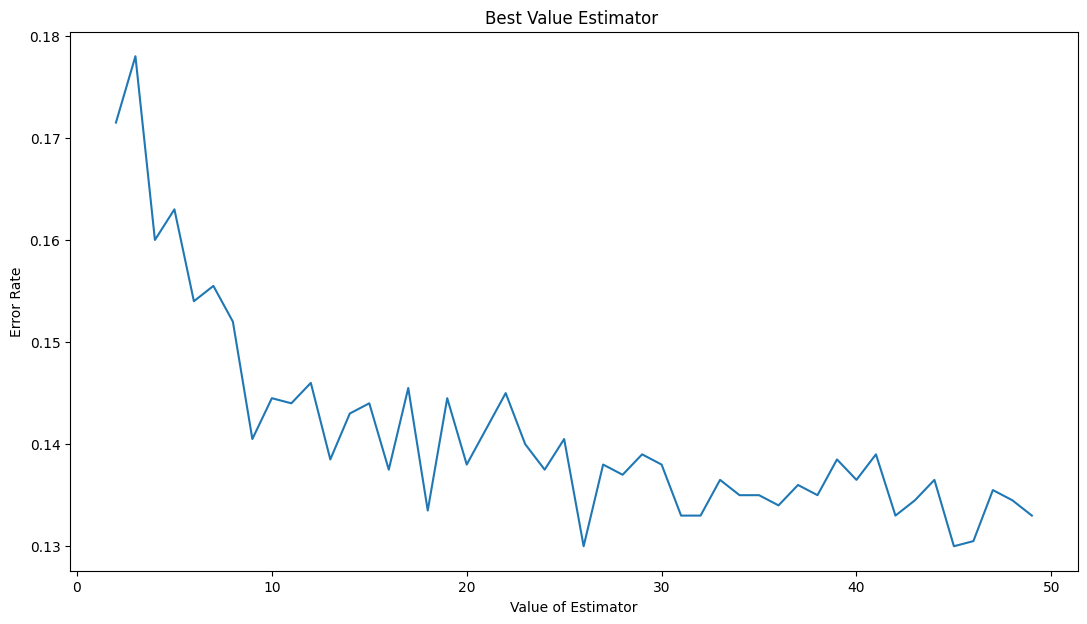

In [24]:
plt.figure(figsize=(13,7))
plt.plot(range(2,50),error)
plt.title('Best Value Estimator ')
plt.xlabel('Value of Estimator')
plt.ylabel('Error Rate')
plt.show()